<a href="https://colab.research.google.com/github/thiagosdfc/Saude/blob/main/Projeto_de_Aplica%C3%A7%C3%A3o_TEAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação de bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [2]:
# Importação do Dataset
data=pd.read_csv('synthetic_health_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [4]:
# Verificando de existem valores nulos no Dataset
data.isnull().sum()

,0
Age,0
BMI,0
Exercise_Frequency,0
Diet_Quality,0
Sleep_Hours,0
Smoking_Status,0
Alcohol_Consumption,0
Health_Score,0


In [5]:
data.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


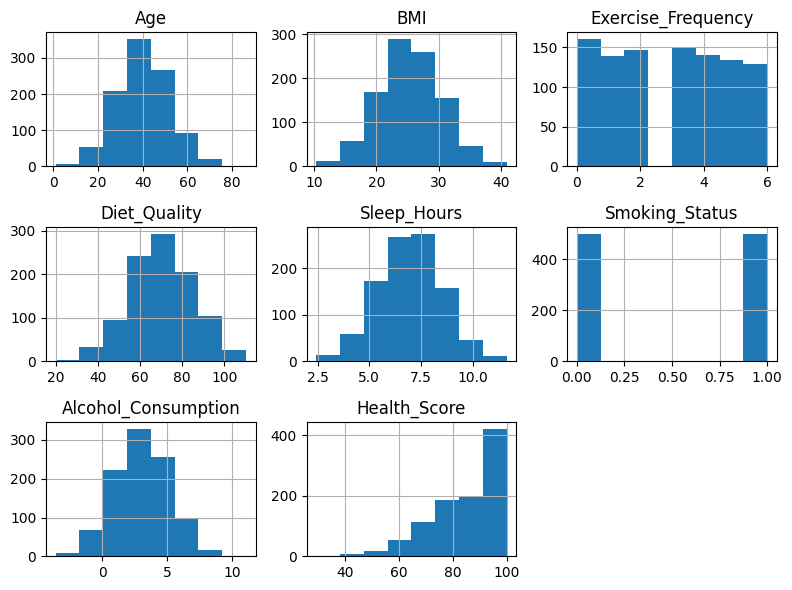

In [6]:
# Verificando se os dados estão normalmente distribuídos
data.hist(bins=8, figsize=(8, 6))
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


[Text(0.5, 1.0, 'Correlation Heatmap')]

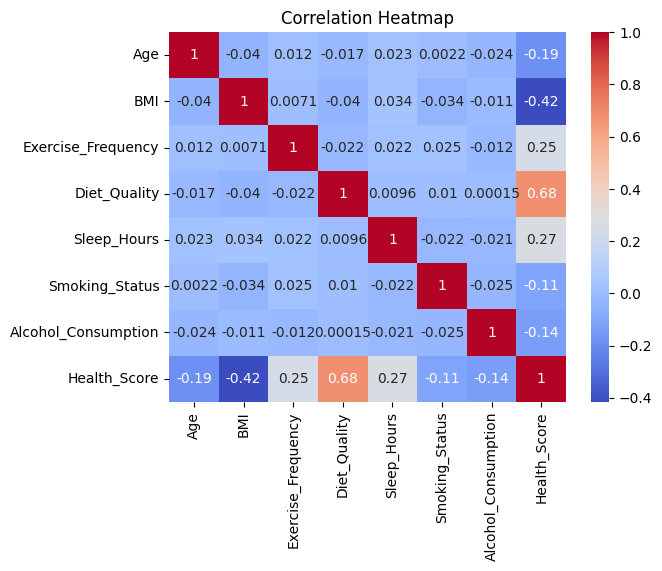

In [7]:
# Verificando se existe correlação entre as variáveis
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm').set(title='Correlation Heatmap')

In [8]:
# Defindo a varável alvo, Health Score, e segmentando ela das demais do dataset
X = data.drop('Health_Score', axis=1)
y = data['Health_Score']

In [9]:
# Dividindo o dataset nos conjuntos de treino, validação e teste.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% treinamento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validação e 20% teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Exportando as amostras usadas pra treinamento, validação e teste
y_train_data = pd.DataFrame(y_train)
y_train_data.to_csv('y_train.csv', index=False)
y_test_data = pd.DataFrame(y_train)
y_test_data.to_csv('y_test.csv', index=False)
y_val_data = pd.DataFrame(y_train)
y_val_data.to_csv('y_val.csv', index=False)
X_train_data = pd.DataFrame(y_train)
X_train_data.to_csv('X_train.csv', index=False)
X_test_data = pd.DataFrame(y_train)
X_test_data.to_csv('X_test.csv', index=False)
X_val_data = pd.DataFrame(y_train)
X_val_data.to_csv('X_val.csv', index=False)

In [11]:
# Aplicando Regressão Linear
print("Linear Regression:")
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

Linear Regression:


LinearRegression()

In [12]:
# Realizando previsões com Regressão Linear
y_pred_lin = lin_reg.predict(X_test_scaled)

In [13]:
# Validando o modelo com o Erro quadrado médio e R²
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Mean Squared Error: {mse_lin}")
print(f"Mean Absolute Error: {mae_lin}")
print(f"R-squared: {r2_lin}")

Mean Squared Error: 34.55215922117792
Mean Absolute Error: 4.516343738502704
R-squared: 0.8368526223900302


In [14]:
# Aplicando Random Forest
print("\nRandom Forest Regressor:")
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


Random Forest Regressor:


RandomForestRegressor(random_state=42)

In [15]:
# Realizando previsões com Random Forest
y_pred_rf = rf_reg.predict(X_test)

# Avaliando a performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 36.35969881127685
Mean Absolute Error: 4.3090468784566065
R-squared: 0.8283178346749374


In [16]:
# Aplicando  XGBoost Regressor
print("\nXGBoost Regressor:")
xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xg_reg.fit(X_train_scaled, y_train)

# Fazendo predições
y_pred_xg = xg_reg.predict(X_test_scaled)

# Avaliando performance
mse_xg = mean_squared_error(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"Mean Squared Error: {mse_xg}")
print(f"Mean Absolute Error: {mae_xg}")
print(f"R-squared: {r2_xg}")


XGBoost Regressor:
Mean Squared Error: 35.9940951289698
Mean Absolute Error: 4.46826705150873
R-squared: 0.8300441314783042


In [26]:
# Avaliando as performande dos três modelos
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_values = [mse_lin, mse_rf, mse_xg]
mae_values = [mae_lin,mae_rf,mae_xg]
r2_values = [r2_lin, r2_rf, r2_xg]

In [27]:
# Avaliando o modelo com o conjunto de validação no Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
# Instead of accuracy_score, use a regression metric like R-squared or Mean Squared Error
# val_accuracy = accuracy_score(y_val, y_val_pred)  <-- Remove this line
# Calculo do R²
val_r2 = r2_score(y_val, y_val_pred)
# Calculo do MAE
val_mae = mean_absolute_error(y_val, y_val_pred)
# Calculo do  MsE
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'R-squared no conjunto de validação: {val_r2:.2f}')
print(f'Mean Absolute Error no conjunto de validação: {val_mae:.2f}')
print(f'Mean Squared Error no conjunto de validação: {val_mse:.2f}')

R-squared no conjunto de validação: 0.80
Mean Absolute Error no conjunto de validação: 4.51
Mean Squared Error no conjunto de validação: 36.78


In [19]:
# Avaliando o modelo com o conjunto de validação na Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
# Calculo do R²
val_r2 = r2_score(y_val, y_val_pred)
# Calculo do MAE
val_mae = mean_absolute_error(y_val, y_val_pred)
# Calculo do  MsE
val_mse = mean_squared_error(y_val, y_val_pred)

print(f'R-squared no conjunto de validação: {val_r2:.2f}')
print(f'Mean Absolute Error no conjunto de validação: {val_mae:.2f}')
print(f'Mean Squared Error no conjunto de validação: {val_mse:.2f}')

R-squared no conjunto de validação: 0.81
Mean Absolute Error no conjunto de validação: 4.50
Mean Squared Error no conjunto de validação: 34.29


In [20]:
# Avaliando o modelo com o conjunto de validação no XGBoost
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

# Calculo do R²
val_r2 = r2_score(y_val, y_val_pred)
# Calculo do  MAE
val_mae = mean_absolute_error(y_val, y_val_pred)
# Calculo do  Mean Squared Error
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'R-squared no conjunto de validação: {val_r2:.2f}')
print(f'Mean Absolute Error no conjunto de validação: {val_mae:.2f}')
print(f'Mean Squared Error no conjunto de validação: {val_mse:.2f}')

R-squared no conjunto de validação: 0.79
Mean Absolute Error no conjunto de validação: 4.68
Mean Squared Error no conjunto de validação: 39.05


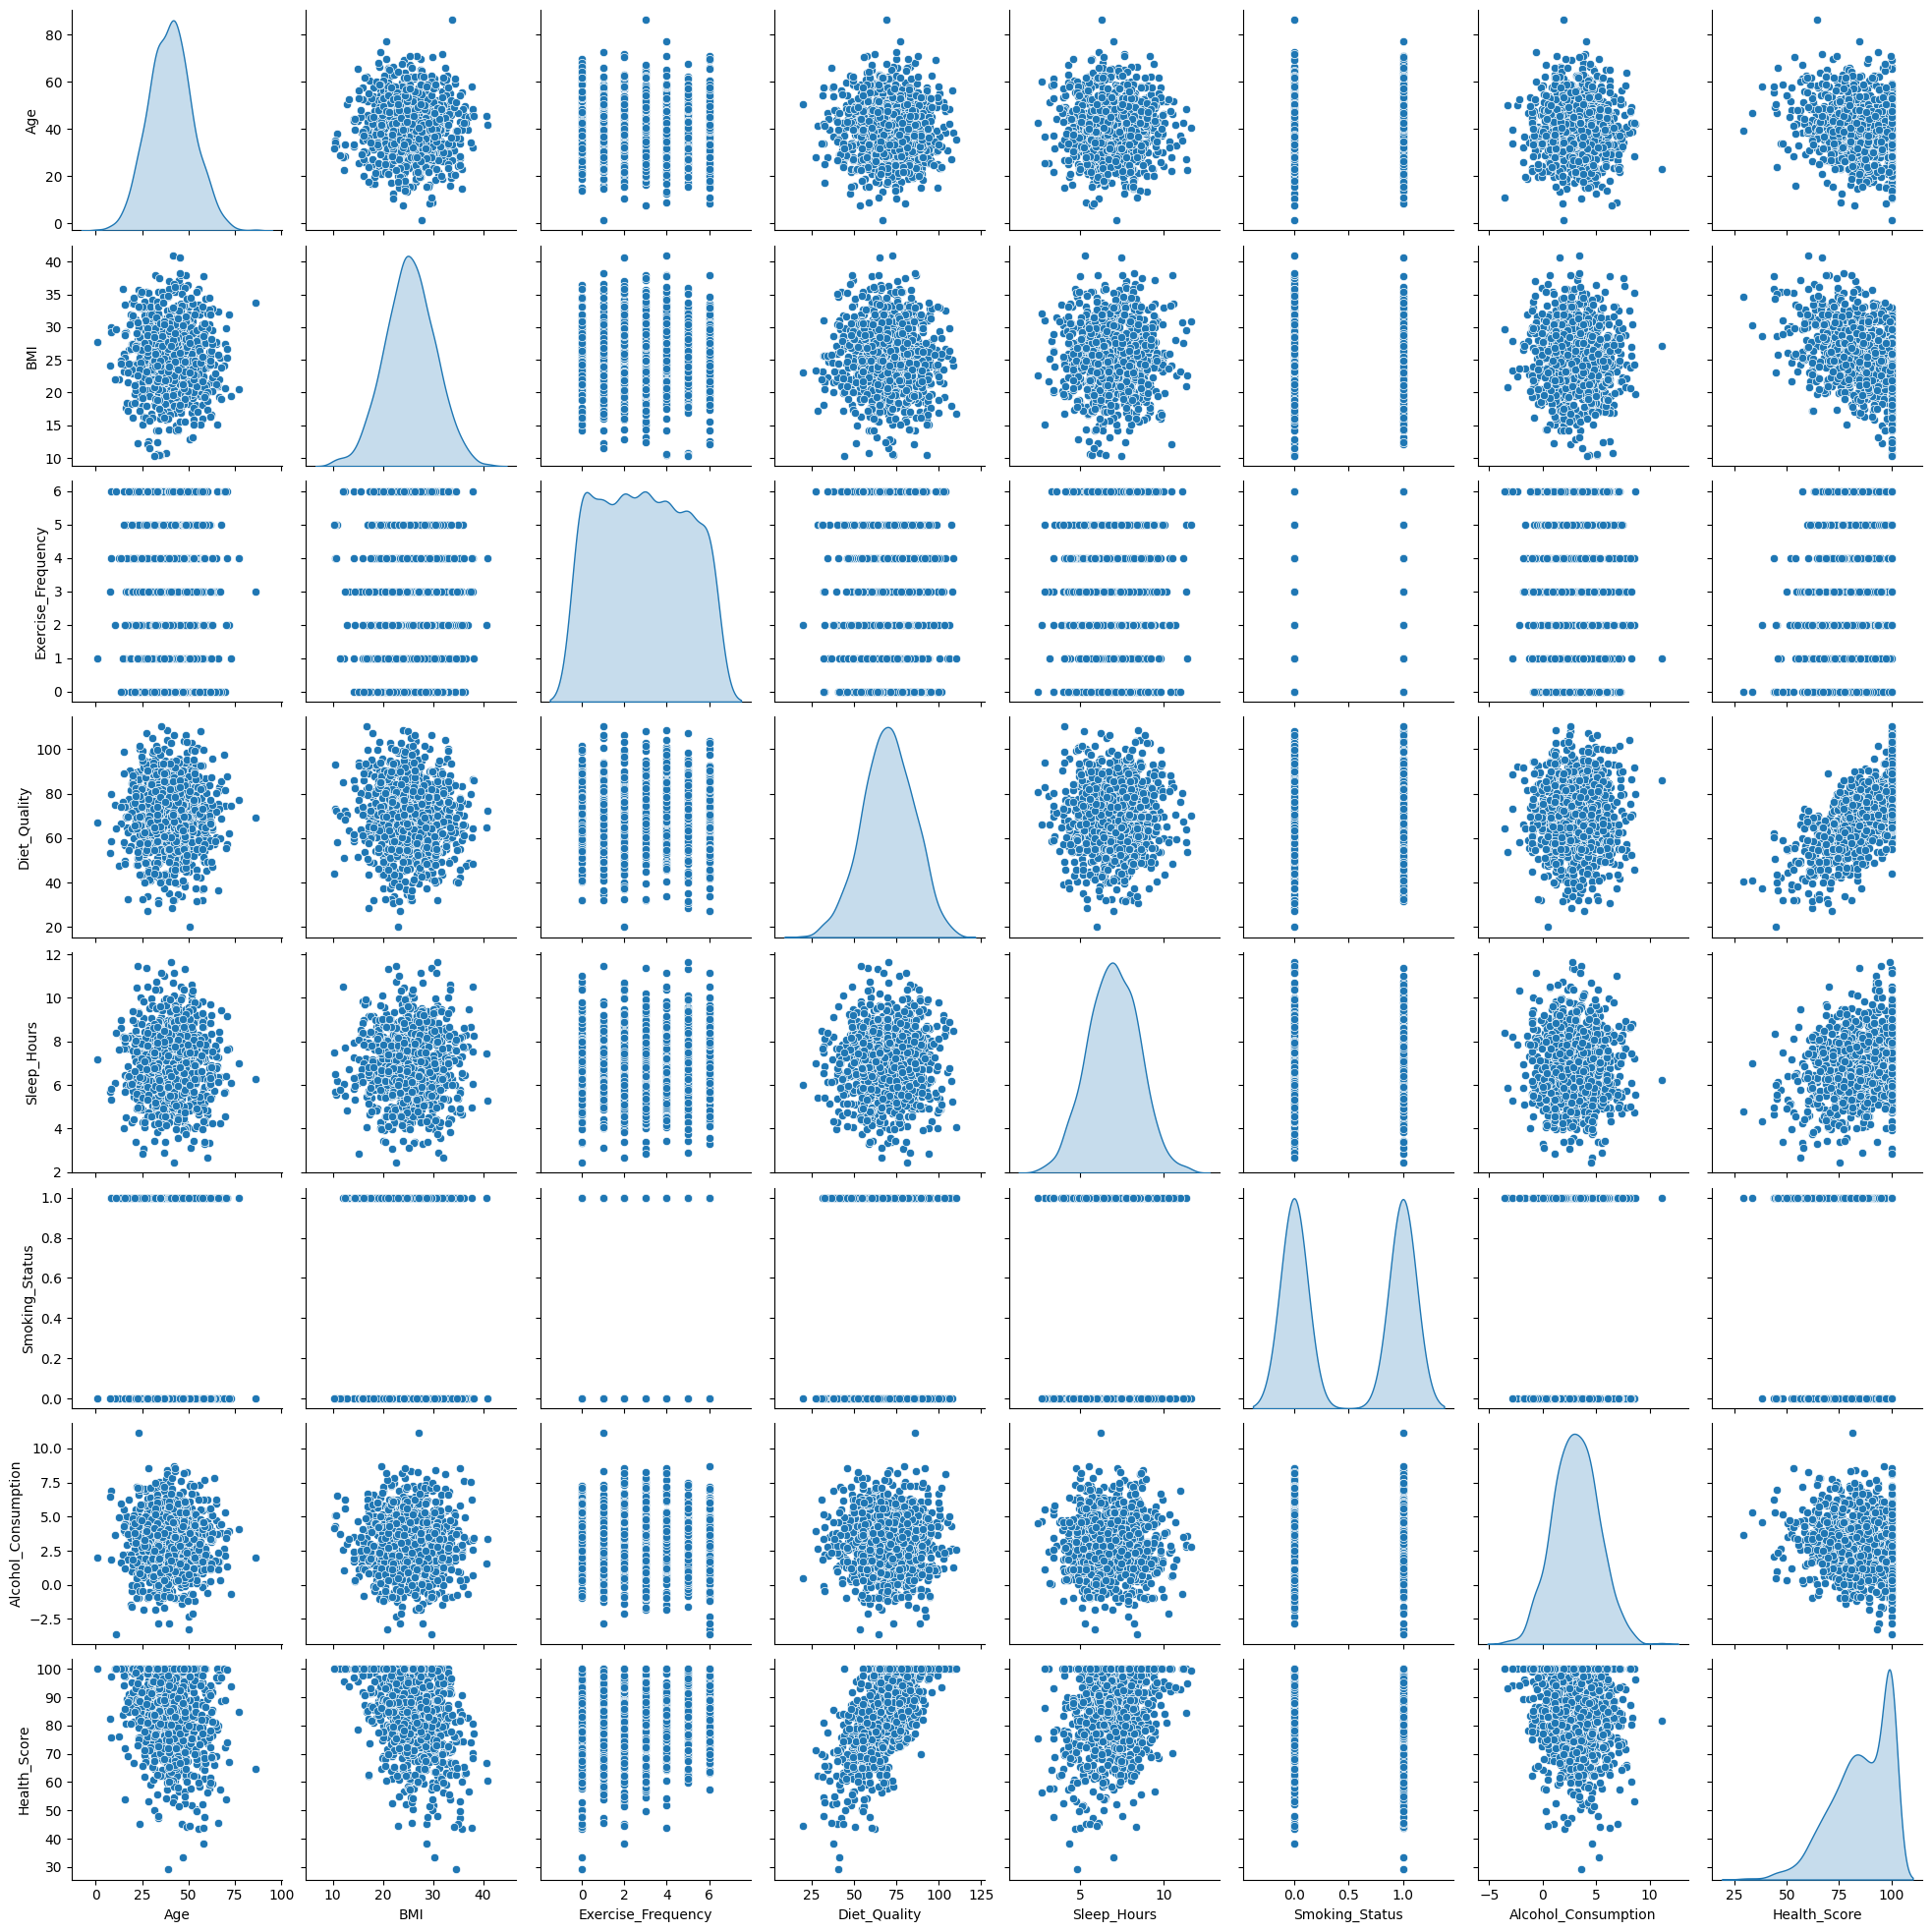

In [21]:
# Analisando a relação entre as variáveos (apenas para ver o comportamento, pois já sabemos que não há correlação)
sns.pairplot(data, diag_kind='kde')
plt.show()

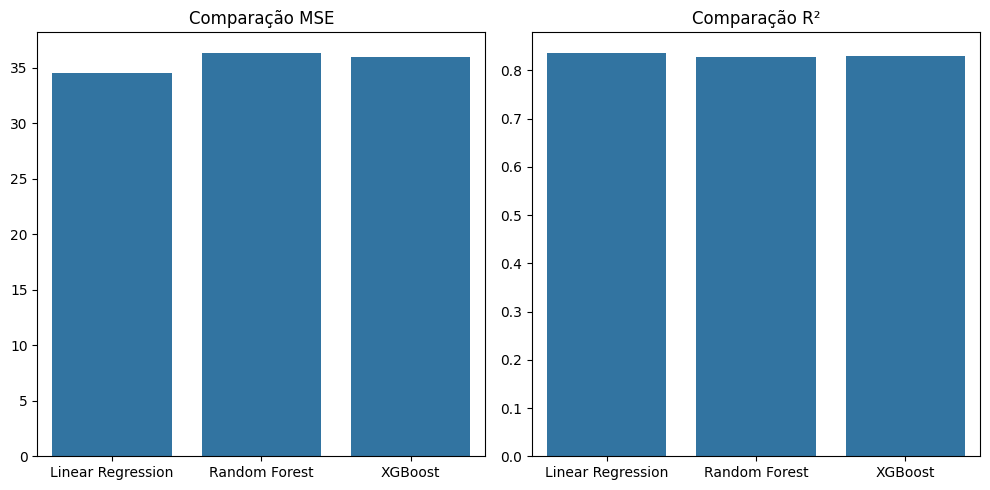

In [30]:
# Comparando os modelos graficamente
plt.figure(figsize=(10, 5))

# Comparativo do Erro Quadrado Médio
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_values)
plt.title('Comparação MSE')

# Comparativo do R²
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_values)
plt.title('Comparação R²')

plt.tight_layout()
plt.show()

In [31]:
# Importando mais bibliotecas necessárias
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definindo Hiperparâmetro pra Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [32]:
# Utilizando o GridSearchCV
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=2,
                              scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Parâmetros do Random Forest
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
# Definindo Hiperparâmetro pra Random Forest
xg_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# RandomizedSearchCV
xg_random_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                                      param_distributions=xg_params,
                                      n_iter=10,
                                      cv=5,
                                      verbose=2,
                                      n_jobs=-1,
                                      scoring='neg_mean_squared_error')
xg_random_search.fit(X_train_scaled, y_train)

# Parâmetros do  XGBoost
print(f"Best XGBoost Parameters: {xg_random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [34]:
# Aplicando Cross-Validation
print("\nCross-Validation for Random Forest:")
rf_cv_score = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation Scores: {rf_cv_score}")
print(f"Mean Cross-Validation Score: {np.mean(rf_cv_score)}")


Cross-Validation for Random Forest:
Random Forest Cross-Validation Scores: [-40.06173075 -32.24300667 -53.60018876 -35.44917168 -50.2289944 ]
Mean Cross-Validation Score: -42.31661845080093


In [35]:
print("\nCross-Validation for XGBoost:")
xg_cv_score = cross_val_score(xg_random_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"XGBoost Cross-Validation Scores: {xg_cv_score}")
print(f"Mean Cross-Validation Score: {np.mean(xg_cv_score)}")

# Verificando a variável de maior importância segundo
print("\nFeature Importance - Random Forest:")
rf_feature_importance = rf_grid_search.best_estimator_.feature_importances_
features = X.columns



Cross-Validation for XGBoost:
XGBoost Cross-Validation Scores: [-27.44943624 -23.19935712 -29.59434771 -31.68471996 -32.71654584]
Mean Cross-Validation Score: -28.928881373993693

Feature Importance - Random Forest:


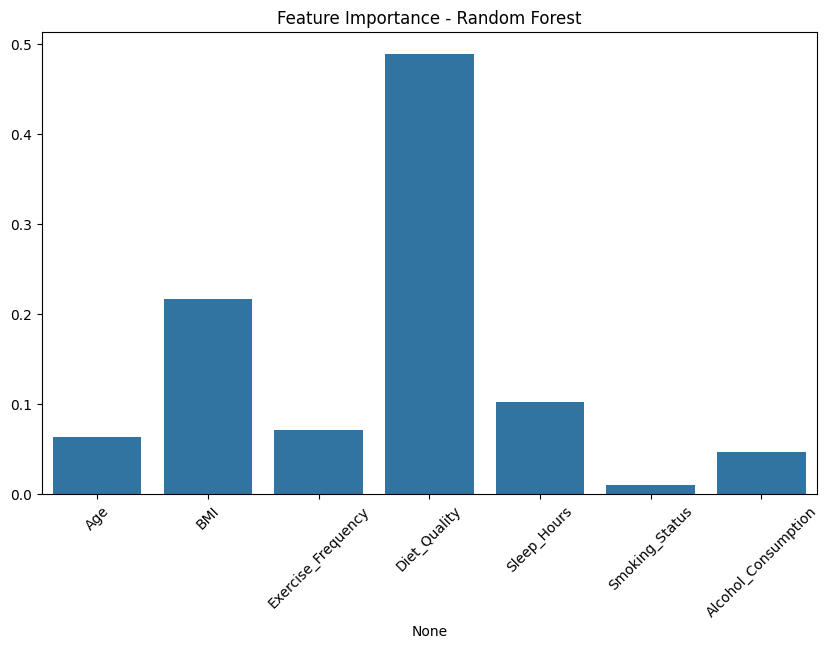


Feature Importance - XGBoost:


In [36]:

# Verificando a variável de maior importância segundo Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=rf_feature_importance)
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=45)
plt.show()

# Verificando a variável de maior importância segundo XGBoost
print("\nFeature Importance - XGBoost:")
xg_feature_importance = xg_random_search.best_estimator_.feature_importances_

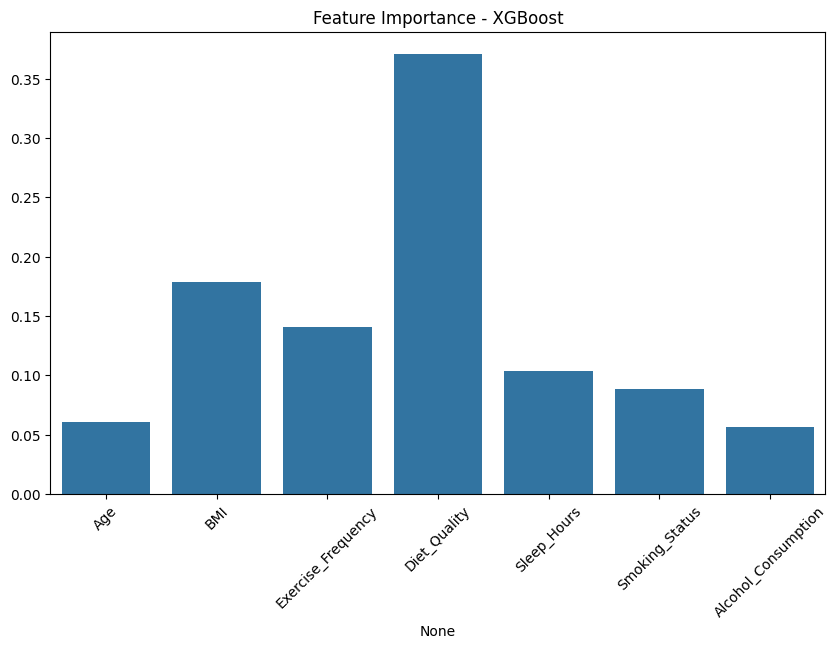

In [37]:
# Visualize Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=xg_feature_importance)
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation=45)
plt.show()

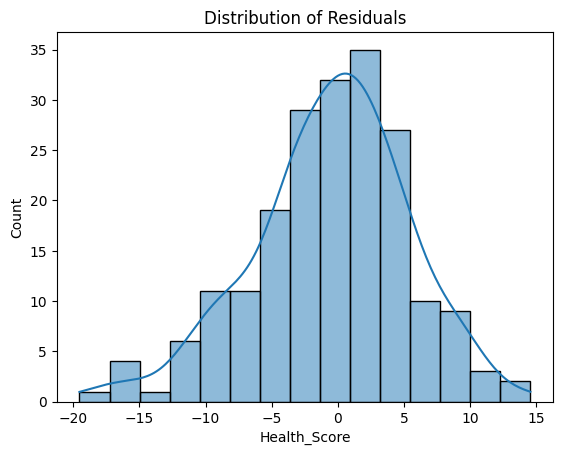

In [38]:
# Definição dos resíduos
residuals = y_test - y_pred_lin

# Distribuição dos resíduos
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()
